In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import cmath
import csv


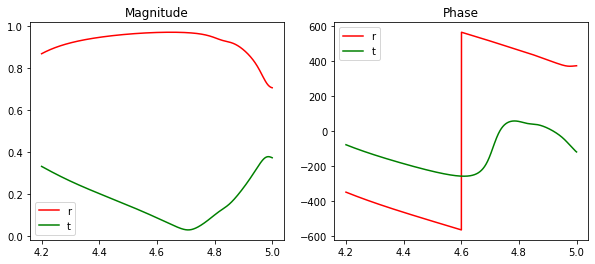

In [49]:

filename = "D:/Coupled-mode Theory/simu for fitting/0.8-0.9.txt"
with open (filename,'rt',encoding='UTF-8') as raw_data:
  data = np.loadtxt(raw_data,delimiter='\t')
xdata = data[:,0] 
rdata = data[:,1] + data[:,2] * 1j
rmag = abs(rdata)                 
rphase = np.angle(rdata) *180

plt.figure(figsize=(10,4))
plt.subplot(121)                              # 拟合的幅值
plt.title("Magnitude")
plt.plot(xdata, rmag, 'r-', label='r')

tdata = data[:,3] + data[:,4] * 1j
tmag = abs(tdata) 
tphase = np.angle(tdata) *180
plt.plot(xdata, tmag, 'g-', label='t')
plt.legend()

plt.subplot(122)                              # 拟合的相位
plt.title("Phase")
plt.plot(xdata, rphase, 'r-', label='r')
plt.plot(xdata, tphase, 'g-', label='t')
plt.legend()

plt.show()

comb_Y = np.concatenate((rmag, [rphase[1300]], tmag, [tphase[1300]]))
comb_X = np.concatenate((xdata, [4.72], xdata, [4.72]))

In [39]:
# 定义需要拟合的函数
def func_t(x, f1re, f2re, kre, Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    t_up = (W_3*2*cmath.cos(2*yita) - (W_1)-(W_2))*Tao1
    t_down = W_2 * W_1 - (W_3)**2
    ft = t_up / t_down + 1
    return ft

In [40]:
def func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    r_up = (W_3*(-2) + (W_1)*cmath.exp(-2j*yita) + (W_2)*cmath.exp(2j*yita))*Tao1
    r_down = W_2 * W_1 - (W_3)**2
    fr = r_up /r_down
    return fr

In [50]:
def fun_comb(x_comb, f1re, f2re, kre, Tao1Are, Tao2Are,  d, yita):
    extract1 = x_comb[:len(xdata)]
    extract2 = [4.72]

    
    result1 = abs(func_r(extract1, f1re, f2re,  kre,  Tao1Are, Tao2Are,  d, yita))
    result2 = abs(func_t(extract1, f1re, f2re,  kre, Tao1Are, Tao2Are,  d, yita))
    phase1 = np.angle(func_r(extract2, f1re, f2re,  kre,  Tao1Are, Tao2Are,  d, yita)) *180
    phase2 = np.angle(func_t(extract2, f1re, f2re,  kre,  Tao1Are, Tao2Are,  d, yita)) *180

    return np.concatenate((result1, phase1, result2, phase2))

In [8]:
# export data for Origin plotting
with open("C:/Users/mamba/Desktop/论文/fig/sim and CMT/data4origin/0.8-1.6.txt",'w') as f:
    b0 = [4.43344806 ,4.3 ,0.45120397 ,0.043, 0.0479 ,1.07894509 ,2.80569594]
    cmtt = func_t(xdata, *b0)
    cmtr = func_r(xdata, *b0)
    for i in range(0,len(xdata),25):
        f.write(str(xdata[i])+'\t'+str(rdata[i])+'\t'+str(tdata[i])+'\t'+str(cmtr[i])+'\t'+str(cmtt[i])+'\n')

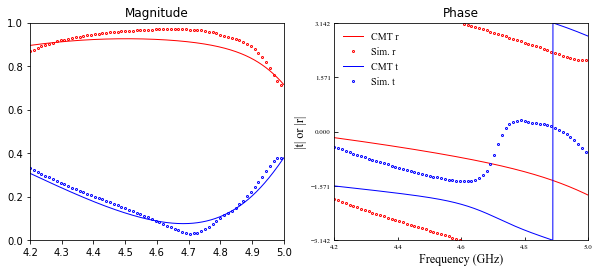

In [65]:
# b0 = popt
plt.figure(figsize=(10,4))

b0 = np.array([4.6454  ,   4.77764355, 0.39002804, 0.043     , 0.0479  ,   0.77739238 ,2.72605469]) 

# b0 = popt
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 10}

plt.subplot(121)                              # 拟合的幅值
plt.title("Magnitude")
plt.plot(xdata, abs(func_r(xdata, *b0)), 'r-', label='CMT r', linewidth=1)
plt.plot(xdata[::30], rmag[::30], 'ro', label='Sim. r', markersize=2, markerfacecolor='none')
plt.plot(xdata, abs(func_t(xdata, *b0)), 'b-', label='CMT t', linewidth=1)
plt.plot(xdata[::30], tmag[::30], 'bo', label='Sim. t', markersize=2, markerfacecolor='none')

plt.xlim(4.2, 5) #设置 坐标轴范围
plt.ylim(0.0, 1.0)
my_x_ticks = np.arange(4.2, 5.01, 0.2) #设置 坐标刻度间隔
my_y_ticks = np.arange(0, 1.1, 0.2)

plt.subplot(122)                              
plt.title("Phase")
plt.plot(xdata, np.angle(func_r(xdata, *b0)), 'r-', label='CMT r', linewidth=1)
plt.plot(xdata[::30], rphase[::30] /180, 'ro', label='Sim. r', markersize=2, markerfacecolor='none')
plt.plot(xdata, np.angle(func_t(xdata, *b0)), 'b-', label='CMT t', linewidth=1)
plt.plot(xdata[::30], tphase[::30] /180, 'bo', label='Sim. t', markersize=2, markerfacecolor='none')

plt.legend(prop=font2, frameon=False)#设置 图例

plt.xlabel('Frequency (GHz)', fontdict=font1) # 设置 坐标名称
plt.ylabel('|t| or |r|', fontdict=font1)

plt.xlim(4.2, 5) #设置 坐标轴范围
plt.ylim(-np.pi, np.pi)
my_x_ticks = np.arange(4.2, 5.1, 0.2) #设置 坐标刻度间隔
my_y_ticks = np.arange(-np.pi, np.pi+0.1, np.pi/2)

plt.tick_params(axis='both',which='major',labelsize=9,direction='in',color='black') #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 7)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 7)
# plt.grid()

plt.show()


In [66]:

# b0 = np.random.rand(7)
# b0 = popt
bound = ([0,0,-30,0,0,0,-cmath.pi], [10,10,30,10,10,30,cmath.pi])

popt, pcov = curve_fit(fun_comb, comb_X, comb_Y, b0, bounds=bound)
print(popt)


[ 1.00000000e+01  1.00000000e+01 -3.00000000e+01  3.68926836e-13
  4.35569729e-13  4.81087505e-12  3.14159265e+00]


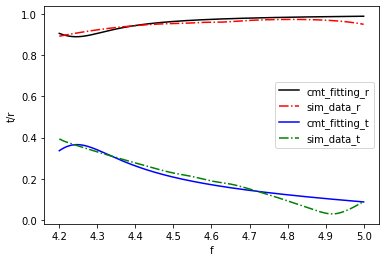

In [579]:
# b0 = [5.05488571, 6.5, 1.05612126 ,0.05521126 ,0.03813429 ,3.02552412 ,1.54265461]
b0 = [4., 3.92811241 ,0.56211417 ,0.0432, 0.0481 ,1.56901798, 2.86810664]
# b0 = (np.array(b4)+np.array(b8))/2

plt.plot(xdata, func_r(xdata, *b0), 'k-', label='cmt_fitting_r')
plt.plot(xdata, rdata, 'r-.', label='sim_data_r')
plt.plot(xdata, func_t(xdata, *b0), 'b-', label='cmt_fitting_t')
plt.plot(xdata, tdata, 'g-.', label='sim_data_t')
plt.xlabel('f')
plt.ylabel('t/r')

plt.legend()
plt.show()

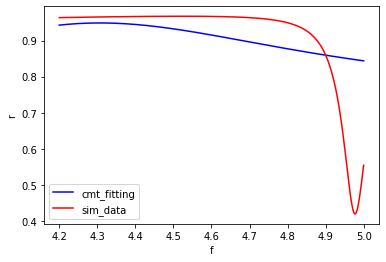

In [929]:
plt.plot(xdata, func_r(xdata, *popt), 'b-', label='cmt_fitting')
plt.plot(xdata, rdata, 'r-', label='sim_data')
plt.xlabel('f')
plt.ylabel('r')
plt.legend()
plt.show()

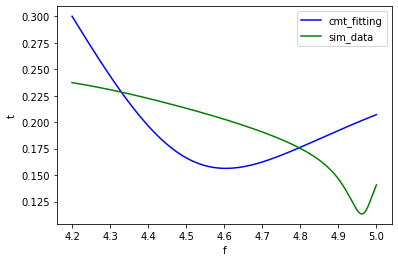

In [930]:
plt.plot(xdata, func_t(xdata, *popt), 'b-', label='cmt_fitting')
plt.plot(xdata, tdata, 'g-', label='sim_data')
plt.xlabel('f')
plt.ylabel('t')
plt.legend()
plt.show()


In [778]:
with open('fitting result.txt', 'a') as f:
    for b in popt:
        f.write('\t' + str(b))
    f.write('\n')